In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt

In [6]:
base_dir='/content/drive/MyDrive/animals'
train_dir=base_dir

In [12]:
image_size=(150,150)
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=42
)

validation_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=42
)

Found 815 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


In [20]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
          Dense(1,activation='sigmoid')

])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [26]:
epochs=20

history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
   validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size,
    epochs=epochs
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.9684 - loss: 0.0919 - val_accuracy: 0.9688 - val_loss: 0.1088
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9062 - loss: 0.1502 - val_accuracy: 1.0000 - val_loss: 0.1655
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.9925 - loss: 0.0500 - val_accuracy: 0.9792 - val_loss: 0.0572
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 1.0000 - loss: 0.0459 - val_accuracy: 1.0000 - val_loss: 0.0925
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9771 - loss: 0.0711 - val_accuracy: 0.9844 - val_loss: 0.0429
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9688 - loss: 0.0487 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9731 - loss: 0.0651 - val_accuracy: 0.9688 - val_loss: 0.0641
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9375 - loss: 0.0825 - val_accuracy: 1.0000 - val_loss

In [28]:
model.save('cat_dog_classifier.h5')

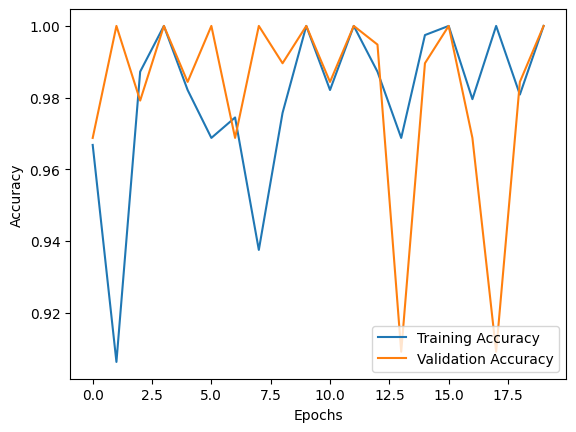

In [32]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The animal is a Dog


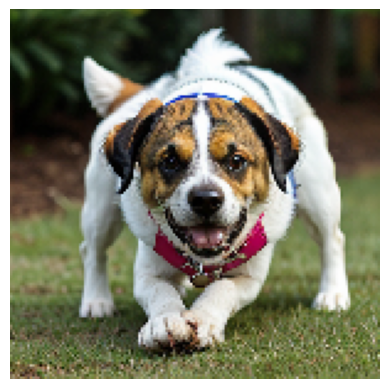

In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def predict_image(image_path,model):
  img=load_img(image_path,target_size=image_size)
  img_array=img_to_array(img)/255.0
  img_array=np.expand_dims(img_array, axis=0)
  prediction=model.predict(img_array)
  return 'The animal is a Dog' if prediction[0][0]>0.5 else 'The animal is a Cat'

def show(image_path):
  img=load_img(image_path,target_size=image_size)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

image_path='/content/drive/MyDrive/animals/dog/00501-3846168663.png'
print(predict_image(image_path,model))
show(image_path)
